# Eval Assignment Example Analysis

This notebook shows how to produce the graphs in the assignment instructions.

## Setup

First, we need to import some Python packages.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Importing Data

Then we import the data.

In [3]:
df = pd.read_csv('build/eval-results.csv')
df = df.rename(columns=lambda x: x.replace('.', '_'))
df

,Partition,Algorithm,BuildTime,TestTime,NUsers,NAttempted,NGood,Coverage,RMSE_ByUser,RMSE_ByRating,Predict_nDCG,TopN_ActualLength,TopN_nDCG,MRR,MAP,TopN_TagEntropy
0,1,GlobalMean,0.216,1.178,173.0,865.0,865.0,1.0,0.913773,0.971289,0.942881,NaN,NaN,NaN,NaN,NaN
1,5,Popular,0.147,0.589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,0.083382,0.146092,0.142745,NaN
2,1,Popular,0.220,0.629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,0.081752,0.178649,0.171775,NaN
3,5,GlobalMean,0.088,0.072,172.0,860.0,860.0,1.0,0.949340,1.022592,0.939204,NaN,NaN,NaN,NaN,NaN
4,5,ItemMean,0.093,0.869,172.0,860.0,860.0,1.0,0.865944,0.945420,0.960667,10.0,0.045492,0.087798,0.089821,NaN
5,1,ItemMean,0.060,0.478,173.0,865.0,865.0,1.0,0.846742,0.918749,0.962223,10.0,0.023417,0.054789,0.046832,NaN
6,5,PersMean,1.004,0.360,172.0,860.0,860.0,1.0,0.796419,0.873847,0.960667,10.0,0.042190,0.091189,0.085617,NaN
7,1,PersMean,0.377,0.234,173.0,865.0,865.0,1.0,0.740479,0.825009,0.962223,10.0,0.025640,0.053280,0.051457,NaN
8,4,ItemMean,0.077,0.275,172.0,860.0,860.0,1.0,0.805856,0.877792,0.967275,10.0,0.024095,0.035412,0.037518,NaN
9,4,Popular,0.085,0.309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,0.104689,0.222776,0.213134,NaN


## Example Plots

Now we can produce the basic plots.

First, we want to only deal with the baseline algorithms right now.

In [8]:
baselines = df[df.NUsers.isnull() == False]
baselines

,Partition,Algorithm,BuildTime,TestTime,NUsers,NAttempted,NGood,Coverage,RMSE_ByUser,RMSE_ByRating,Predict_nDCG,TopN_ActualLength,TopN_nDCG,MRR,MAP,TopN_TagEntropy
0,1,GlobalMean,0.216,1.178,173.0,865.0,865.0,1.0,0.913773,0.971289,0.942881,NaN,NaN,NaN,NaN,NaN
3,5,GlobalMean,0.088,0.072,172.0,860.0,860.0,1.0,0.949340,1.022592,0.939204,NaN,NaN,NaN,NaN,NaN
4,5,ItemMean,0.093,0.869,172.0,860.0,860.0,1.0,0.865944,0.945420,0.960667,10.0,0.045492,0.087798,0.089821,NaN
5,1,ItemMean,0.060,0.478,173.0,865.0,865.0,1.0,0.846742,0.918749,0.962223,10.0,0.023417,0.054789,0.046832,NaN
6,5,PersMean,1.004,0.360,172.0,860.0,860.0,1.0,0.796419,0.873847,0.960667,10.0,0.042190,0.091189,0.085617,NaN
7,1,PersMean,0.377,0.234,173.0,865.0,865.0,1.0,0.740479,0.825009,0.962223,10.0,0.025640,0.053280,0.051457,NaN
8,4,ItemMean,0.077,0.275,172.0,860.0,860.0,1.0,0.805856,0.877792,0.967275,10.0,0.024095,0.035412,0.037518,NaN
10,4,GlobalMean,0.134,0.014,172.0,860.0,860.0,1.0,0.914807,0.980373,0.939124,NaN,NaN,NaN,NaN,NaN
11,4,PersMean,0.264,0.385,172.0,860.0,860.0,1.0,0.715982,0.788661,0.967275,10.0,0.024095,0.036679,0.036896,NaN
12,2,GlobalMean,0.016,0.014,173.0,865.0,865.0,1.0,0.971937,1.049804,0.938129,NaN,NaN,NaN,NaN,NaN


Then we can plot RMSE:

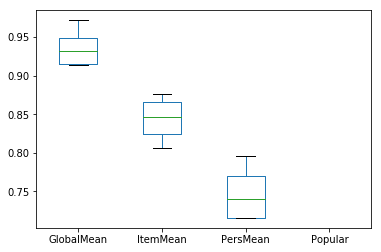

In [11]:
const_rmse = df.pivot(index='Partition', columns='Algorithm', values='RMSE_ByUser')
const_rmse.plot(kind='box')

Now we can do top-N nDCG:

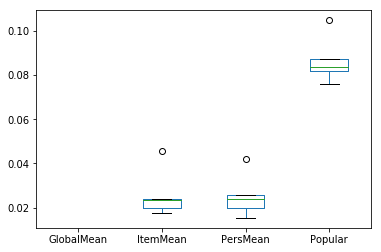

In [12]:
df.pivot(index='Partition', columns='Algorithm', values='TopN_nDCG').plot(kind='box')

And Predict nDCG:

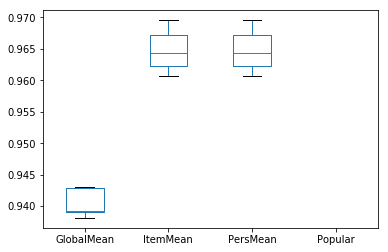

In [13]:
df.pivot(index='Partition', columns='Algorithm', values='Predict_nDCG').plot(kind='box')